# **Problem**

จากการศึกษาเรื่องการใช้ TensorFlow เพื่อการแบ่งกลุ่มข้อความ จงค้นคว้าเพิ่มเติม เพื่อสร้าง Deep Learning Neural Networks ที่สามารถแบ่งข้อความออกเป็น 5 กลุ่ม ได้แก่ Social, Technological, Economic, Environmental และ Political โดยข้อมูลดาวน์โหลดได้ที่
https://drive.google.com/open?id=1-AE9qY9mnFTjDAWlIcD2nfJDMdP5p7CK

ข้อมูลเพิ่มเติม
-	loss function ของ model ไม่สามารถใช้ binary_classentropy เนื่องจากการแบ่งคลาสไม่ใช่ binary โปรดศึกษาเพิ่มเติมสำหรับ loss ที่เหมาะสม จาก  https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
-	จำนวน Output Nodes ควรมีค่าเท่ากับจำนวนกลุ่ม

ข้อกำหนดที่ต้องการ
-	ทำการแบ่งข้อมูลที่ดาวน์โหลดออกเป็น 2 ส่วนคือ Training Dataset กับ Testing Dataset ในสัดส่วน 75% และ 25% ตามลำดับ
-	ปรับ Hyperparameters เพื่อให้:
  
  --	Accuracy ที่ได้จาก Training และ Testing ไม่ต่ำกว่า 80%

  --  Loss ของ Training และ Testing มีแนวโน้มไม่สูงขึ้น
  
  --	ทำการทดลองซ้ำได้ และได้ผลลัพธ์เดิม

วิธีการส่ง
-	พัฒนาโปรแกรมด้วย Python Google Colab 
-	เขียนอภิปรายวิธีการ ผลลัพธ์ และสรุปลง Notebook ประกอบกับโปรแกรมที่พัฒนา
-	ส่ง URL ของ Notebook มาที่ https://classroom.github.com/classrooms/46705327-cpe-utcc-phd-qe-ml



# **Data Preprocess**

In [1]:
pwd

'/content'

In [2]:
# Load data from UTCC Example source
!gdown --id 1-AE9qY9mnFTjDAWlIcD2nfJDMdP5p7CK

Downloading...
From: https://drive.google.com/uc?id=1-AE9qY9mnFTjDAWlIcD2nfJDMdP5p7CK
To: /content/steep_01_clean.csv
100% 108k/108k [00:00<00:00, 96.6MB/s]


In [3]:
ls

sample_data/  steep_01_clean.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# df = pd.read_csv('steep_01_clean.csv')
# This code is fail

In [6]:
# How to load data and fix problem follow : https://stackoverflow.com/questions/55129640/read-csv-into-a-dataframe-with-varying-row-lengths-using-pandas/55129746#55129746
# and : https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data/352127

col_names = ["text", "label"]
all_df = pd.read_csv('steep_01_clean.csv', names=col_names, sep='|')
all_df

,text,label
0,"Platinum will trade at $1,055.30 an ounce in a...",0
1,Metadata will be critical to adding intelligen...,4
2,Agricultural robot Agbot II could save Austral...,3
3,Saudi 0 growth will slow to about 1 percent ne...,0
4,Theresa May has been warned to expect a full-b...,2
...,...,...
764,Italy's banking system is likely to remain in ...,2
765,Acts of terrorism that ultimately result in re...,2
766,Secretary-General noted that there was a high ...,2
767,A protracted conflict in Burundi could have si...,2


In [0]:
# Export File : all_df มาเปิดด้วยโปรแกรม Excel เพื่อตรวจสอบความถูกต้องอีกครั้งหนึ่ง
all_df.to_csv('all_data.csv')

In [8]:
ls

all_data.csv  sample_data/  steep_01_clean.csv


ไฟล์ all_data ตรวจสอบแล้ว มีการเพิ่มชื่อ Column และแยก text และ label ออกจากกันด้วย (|) แล้ว

![alt text](https://www.img.in.th/images/61680e5ea24381c1352f17e05cd124de.png)

In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 2 columns):
text     769 non-null object
label    769 non-null int64
dtypes: int64(1), object(1)
memory usage: 12.1+ KB


In [10]:
all_df.groupby("label").describe()
# โดยที่ 
# 0 = Social
# 1 = Technological
# 2 = Economic
# 3 = Environmental
# 4 = Political 

text                                                               
      count unique                                                top freq
label                                                                     
0       208    208  The Slovakian economy grew 3.6% in 2015, drive...    1
1        46     46  19 12 Future Operating Environment 2035 will p...    1
2       399    399  The relationship between Washington and Beijin...    1
3        66     66  Defense spending on research and development w...    1
4        50     50  By 2035, extremists will almost certainly be m...    1

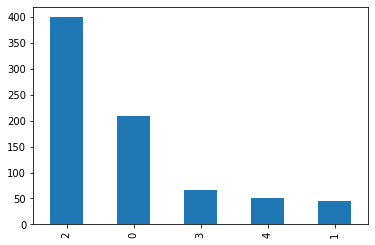

In [11]:
all_df.label.value_counts().plot.bar()
# ปริมาณของข้อความในแต่ละ label มีความไม่สมดุลกัน ในที่นี้ขอพิจารณา ไม่แก้ปัญหา Imbalance data

***Train Test Split Data*** จากโจทย์ Testing Dataset ในสัดส่วน 75% และ 25%

In [0]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(all_df, test_size=0.25, random_state=2020)

# Fix random_state=2020 เพื่อให้ได้ผลลัพธ์เท่าเดิมทุกครั้ง

In [13]:
train_df.head()

,text,label
366,Advancements in storage battery technology cou...,4
667,The introduction of unmanned and autonomous sy...,2
69,Harnessing advances in AI to their fullest pot...,2
122,U.S. lawmakers approved changes to Internation...,2
289,More than 50% of global EV sales are expected ...,0


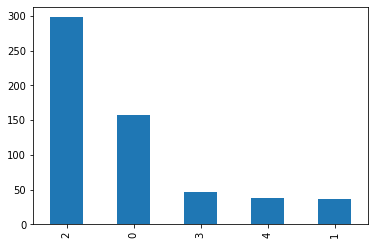

In [14]:
train_df.label.value_counts().plot.bar()

In [15]:
test_df.head()

,text,label
371,Growth will be concentrated in relatively few ...,0
358,A statistical analysis sponsored by the Peace ...,2
749,UK unemployment is forecast to rise from 5% to...,0
131,Russia and its allies could push to shift cont...,2
606,Software flaw puts mobile phones and networks ...,3


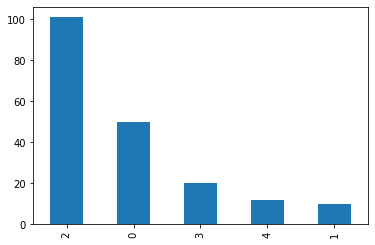

In [16]:
test_df.label.value_counts().plot.bar()

# **Using Traditional Model to fine baseline**

***Clean Data***

In [0]:
train_data = train_df['text']
test_data = test_df['text']

train_label = train_df['label']
test_label = test_df['label']

In [18]:
!pip install nltk

In [0]:
# import nltk
# nltk.download('punkt')
# import nltk.data
# tokenizer = nltk.data.load('tokenizers/punkt/PY3/english.pickle')
# from nltk.tokenize import word_tokenize
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords.words('english')

In [20]:
import re
import nltk as nlp
import nltk
nltk.download('wordnet')

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
lemma = nlp.WordNetLemmatizer()  

In [0]:
train_words_list = []         
for each in train_data:
    each = re.sub("[^a-zA-Z]"," ", str(each))      # regex to clean unnecesarry chars
    each = each.lower()                            # lowercase all
    each = nlp.word_tokenize(each)                 # split all by tokenizing
    each = [word for word in each if not word in set(stopwords.words("english"))]  # delete stop words from your array
    each = [lemma.lemmatize(word) for word in each]                                # lemmatize "memories" -> "memory"
    each = " ".join(each)                                                          # make them one string again
    train_words_list.append(each)   

In [23]:
print("Original version: ", train_data.iloc[35])
print("New version:      ", train_words_list[35])    # no unnecesary words or symbols

Original version:  Shale gas fracking will undermine the UK's ability to achieve its 2050 climate change target unless the industry is strictly regulated.
New version:       shale gas fracking undermine uk ability achieve climate change target unless industry strictly regulated


In [0]:
test_words_list = []         
for each in test_data:
    each = re.sub("[^a-zA-Z]"," ", str(each))                                        
    each = each.lower()                                                             
    each = nlp.word_tokenize(each)                                                 
    each = [word for word in each if not word in set(stopwords.words("english"))]  
    each = [lemma.lemmatize(word) for word in each]                               
    each = " ".join(each)                                                        
    test_words_list.append(each) 

In [25]:
print("Original version: ", test_data.iloc[101])
print("New version:      ", test_words_list[101])

Original version:  New census numbers show that in the U.S., 48 percent of the population below age 18 identify as persons of color. Racial minorities now comprise a majority of youth in 13 states.
New version:       new census number show u percent population age identify person color racial minority comprise majority youth state


***Feature Extraction by Bag of Word***

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

sparce_matrix = CountVectorizer(stop_words="english")

In [27]:
sparce_matrix.fit(train_words_list)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
clean_words = sparce_matrix.get_feature_names()
print("first 50 words :", clean_words[:50])

first 50 words : ['abdu', 'abet', 'abide', 'abiding', 'ability', 'able', 'abroad', 'absence', 'absurd', 'academia', 'academic', 'accelerate', 'accelerated', 'accelerating', 'accept', 'acceptable', 'acceptance', 'access', 'accompanied', 'accomplished', 'according', 'account', 'accountability', 'accountable', 'accountancy', 'accurately', 'achieve', 'achieving', 'acquired', 'acquiring', 'acquisition', 'act', 'action', 'activist', 'activity', 'actor', 'actually', 'ad', 'ada', 'adapt', 'add', 'adding', 'additional', 'address', 'addressed', 'adequate', 'adequately', 'adidas', 'adjusting', 'adjustment']


In [0]:
train_feature = sparce_matrix.transform(train_words_list)
test_feature = sparce_matrix.transform(test_words_list)

In [30]:
train_feature

<576x2586 sparse matrix of type '<class 'numpy.int64'>'
	with 6752 stored elements in Compressed Sparse Row format>

In [31]:
train_feature.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
test_feature

<193x2586 sparse matrix of type '<class 'numpy.int64'>'
	with 1721 stored elements in Compressed Sparse Row format>

In [33]:
test_feature.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

***Create Model and Evaluation***

In [0]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [0]:
model_SVC = LinearSVC(random_state=2020)

In [36]:
model_SVC.fit(train_feature, train_label)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=2020, tol=0.0001,
          verbose=0)

In [0]:
predict_SVC = model_SVC.predict(test_feature)

In [38]:
acc_SVC = classification_report(test_label, predict_SVC, digits=4)
print(acc_SVC)

              precision    recall  f1-score   support

           0     0.7857    0.8800    0.8302        50
           1     0.8333    0.5000    0.6250        10
           2     0.8611    0.9208    0.8900       101
           3     0.7143    0.5000    0.5882        20
           4     0.5556    0.4167    0.4762        12

    accuracy                         0.8135       193
   macro avg     0.7500    0.6435    0.6819       193
weighted avg     0.8059    0.8135    0.8037       193



# **Using Deep Learning**


Follow as https://towardsdatascience.com/multi-class-text-classification-with-lstm-using-tensorflow-2-0-d88627c10a35

And https://github.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial

In [39]:
# Load data from UTCC Example source
!gdown --id 1-AE9qY9mnFTjDAWlIcD2nfJDMdP5p7CK

Downloading...
From: https://drive.google.com/uc?id=1-AE9qY9mnFTjDAWlIcD2nfJDMdP5p7CK
To: /content/steep_01_clean.csv
100% 108k/108k [00:00<00:00, 40.7MB/s]


In [40]:
ls

all_data.csv  sample_data/  steep_01_clean.csv


In [41]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 66kB/s 
     |████████████████████████████████| 450kB 55.8MB/s 
     |████████████████████████████████| 3.8MB 39.6MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [42]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [43]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .75

In [45]:
import re
import nltk as nlp
import nltk
nltk.download('wordnet')

from nltk.corpus import stopwords
lemma = nlp.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
articles = []
labels = []

with open("steep_01_clean.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='|')
    next(reader)
    for row in reader:
        labels.append(row[1])
        article = row[0]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

768
768


In [47]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

576
576
576
192
192


In [48]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_articles)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

7
200
21
200
14
200


In [49]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

192
(192, 200)


In [0]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
  
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 369,734
Trainable params: 369,734
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
num_epochs = 15
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 576 samples, validate on 192 samples
Epoch 1/15
576/576 - 2s - loss: 1.6853 - accuracy: 0.4392 - val_loss: 1.3783 - val_accuracy: 0.6250
Epoch 2/15
576/576 - 1s - loss: 1.3779 - accuracy: 0.4844 - val_loss: 1.2035 - val_accuracy: 0.6250
Epoch 3/15
576/576 - 1s - loss: 1.3209 - accuracy: 0.4844 - val_loss: 1.1463 - val_accuracy: 0.6250
Epoch 4/15
576/576 - 1s - loss: 1.2960 - accuracy: 0.4844 - val_loss: 1.2233 - val_accuracy: 0.6250
Epoch 5/15
576/576 - 1s - loss: 1.2929 - accuracy: 0.4844 - val_loss: 1.1709 - val_accuracy: 0.6250
Epoch 6/15
576/576 - 1s - loss: 1.2700 - accuracy: 0.4844 - val_loss: 1.1288 - val_accuracy: 0.6250
Epoch 7/15
576/576 - 1s - loss: 1.2434 - accuracy: 0.5174 - val_loss: 1.1484 - val_accuracy: 0.6302
Epoch 8/15
576/576 - 1s - loss: 1.1782 - accuracy: 0.5312 - val_loss: 1.1448 - val_accuracy: 0.6719
Epoch 9/15
576/576 - 1s - loss: 1.0779 - accuracy: 0.6597 - val_loss: 1.0637 - val_accuracy: 0.6719
Epoch 10/15
576/576 - 1s - loss: 0.9323 - accuracy: 0.

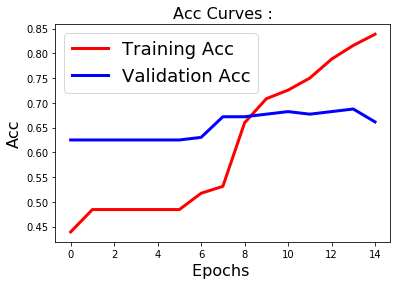

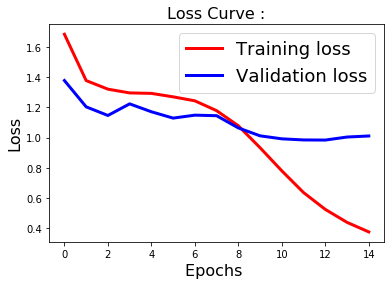

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Acc', 'Validation Acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Acc',fontsize=16)
plt.title('Acc Curves :',fontsize=16)
plt.show()


plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curve :',fontsize=16)
plt.show()

# **Tune Hyperparameters**

Follow as https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

In [55]:
model_tune = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
  
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])
model_tune.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 64)           320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 128)          41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [0]:
model_tune.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
num_epochs = 15
history_tune = model_tune.fit(train_padded, training_label_seq, epochs=num_epochs, 
                              validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 576 samples, validate on 192 samples
Epoch 1/15
576/576 - 2s - loss: 1.9847 - accuracy: 0.3247 - val_loss: 1.7488 - val_accuracy: 0.6250
Epoch 2/15
576/576 - 1s - loss: 1.7825 - accuracy: 0.4410 - val_loss: 1.4270 - val_accuracy: 0.6250
Epoch 3/15
576/576 - 1s - loss: 1.5786 - accuracy: 0.4722 - val_loss: 1.3227 - val_accuracy: 0.6250
Epoch 4/15
576/576 - 1s - loss: 1.5255 - accuracy: 0.4479 - val_loss: 1.3353 - val_accuracy: 0.6250
Epoch 5/15
576/576 - 1s - loss: 1.5212 - accuracy: 0.4514 - val_loss: 1.2841 - val_accuracy: 0.6250
Epoch 6/15
576/576 - 1s - loss: 1.4644 - accuracy: 0.4531 - val_loss: 1.2331 - val_accuracy: 0.6250
Epoch 7/15
576/576 - 1s - loss: 1.3975 - accuracy: 0.4514 - val_loss: 1.2466 - val_accuracy: 0.6250
Epoch 8/15
576/576 - 1s - loss: 1.3141 - accuracy: 0.4688 - val_loss: 1.1992 - val_accuracy: 0.6250
Epoch 9/15
576/576 - 1s - loss: 1.2751 - accuracy: 0.4653 - val_loss: 1.2101 - val_accuracy: 0.6250
Epoch 10/15
576/576 - 1s - loss: 1.1694 - accuracy: 0.

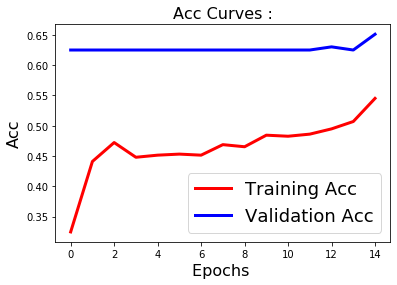

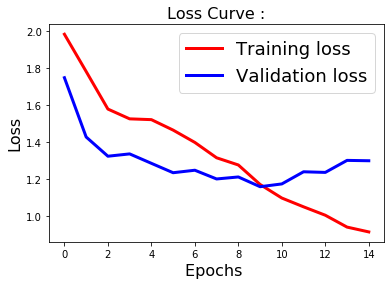

In [58]:
plt.plot(history_tune.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_tune.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Acc', 'Validation Acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Acc',fontsize=16)
plt.title('Acc Curves :',fontsize=16)
plt.show()


plt.plot(history_tune.history['loss'],'r',linewidth=3.0)
plt.plot(history_tune.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curve :',fontsize=16)
plt.show()



# **Conclusion**

จากที่ได้ทำการทดลอง จาก Data Set จำนวน 768 แถว มีการแบ่ง Data Set เป็นสัดส่วน 75 : 25 และได้ทำการสร้างโมเดลจาก Convolutional Neural Network (CNN)


ทำการสอน Model จำนวน 15 Epoch พบว่า

ค่า Accuracy ของ Training Data สามารถมีค่าเกิน 80% และค่า Loss ของ Training Data จะลดลง

ค่า Accuracy ของ Validate Data มีค่าไม่เกิน 66% และค่า Loss ของ Validate Data จะเพิ่มสูงขึ้นเรื่อยๆ

อาจสรุปได้ว่า เป็น Model ที่มีลักษณะ Over Fitting หรือ จำผลการทำนายเกินไป


เมื่อทำการปรับ Hyper Parameter เพื่อไม่ให้ Model มีลักษณะ Overfitting 
ทำการสอน Model ใหม่ จำนวน 15 Epoch เท่ากัน ได้เป็น  พบว่า

ค่า Accuracy ของ Training Data มีค่าไม่เกิน 55% และค่า Loss ของ Training Data จะลดลง

ค่า Accuracy ของ Validate Data มีค่าไม่เกิน 66% และค่า Loss ของ Validate Data จะเพิ่มสูงขึ้นเรื่อยๆ

สันนิษฐานได้ว่า จำนวน Data Set อาจน้อยเกินไปสำหรับการ สอน Model และปัญหาการไม่สมดุลกันของข้อมูลในแต่ละ label จึงทำให้ Model เกิดการ Overfitting และ ปรับ Hyper Parameter ก็ทำให้ค่า Accuracy เพิ่มขึ้นแต่อย่างได้ ซึ่งหากข้อมูลมีจำนวนไม่มากนั้น การใช้ Traditional Model อาจจะทำให้ได้ค่า Accuracy ที่ดีกว่า   
